In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import project_path

In [3]:
import glob
import os

from pathlib import Path
from itertools import product

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from src.plotting import make_result_heatmap, add_lines

In [4]:
path_in = Path(f'../benchmarks/benchmark_SMB.csv').resolve()
path_out = Path(f'../plots/benchmarks/SBM').resolve()
path_out.mkdir(parents=True, exist_ok=True)

In [5]:
df = pd.read_csv(path_in, index_col=False)
df_lb_2 = pd.read_csv('./SBM_theory_lb_f_0.2.csv', index_col=False)
df_lb_3 = pd.read_csv('./SBM_theory_lb_f_0.3.csv', index_col=False)
df_lb_4 = pd.read_csv('./SBM_theory_lb_f_0.4.csv', index_col=False)
df_sc = df[df['method'] == 'Spectral Custering'].drop('method', axis=1).reset_index()

FileNotFoundError: [Errno 2] File /home/dfioravanti/Documents/Codice/tangles/benchmarks/benchmark_SMB.csv does not exist: '/home/dfioravanti/Documents/Codice/tangles/benchmarks/benchmark_SMB.csv'

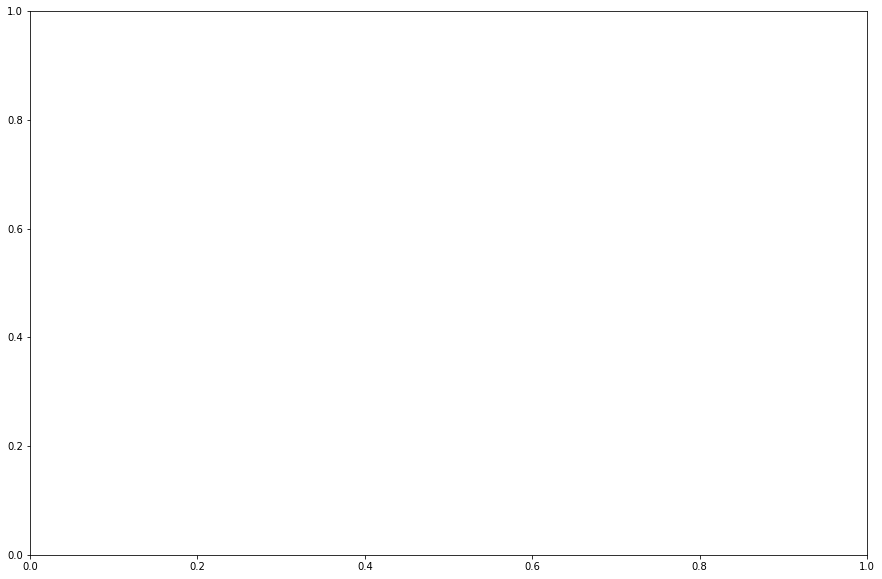

In [34]:
fig, ax = plt.subplots(figsize=(15, 10))

In [37]:
df = df_lb_2.pivot(index='q', columns='p', values='ars').round(2).sort_index(ascending=False).sort_index(axis=1)
xs = df.columns.to_numpy()
ys = df.index.to_numpy()
values2 = df.to_numpy()

In [44]:
df = df_lb_3.pivot(index='q', columns='p', values='ars').round(2).sort_index(ascending=False).sort_index(axis=1)
xs = df.columns.to_numpy()
ys = df.index.to_numpy()
values3 = df.to_numpy()

In [45]:
df = df_lb_4.pivot(index='q', columns='p', values='ars').round(2).sort_index(ascending=False).sort_index(axis=1)
xs = df.columns.to_numpy()
ys = df.index.to_numpy()
values4 = df.to_numpy()

In [48]:
df = df_sc.pivot(index='q', columns='p', values='score').round(2).sort_index(ascending=False).sort_index(axis=1)
xs = df.columns.to_numpy()
ys = df.index.to_numpy()
values_sc = df.to_numpy()

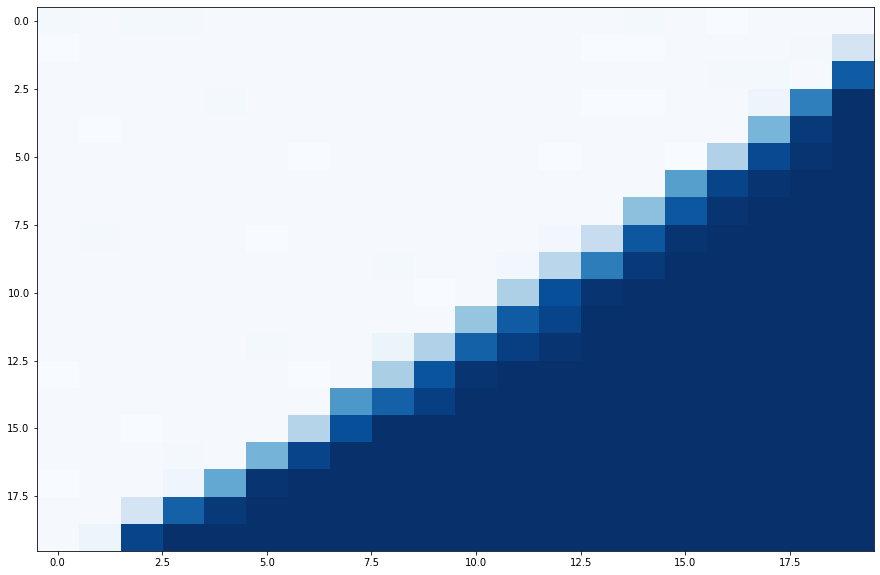

In [65]:
ax.imshow(values_sc, cmap=plt.cm.get_cmap('Blues'), aspect='auto')
fig

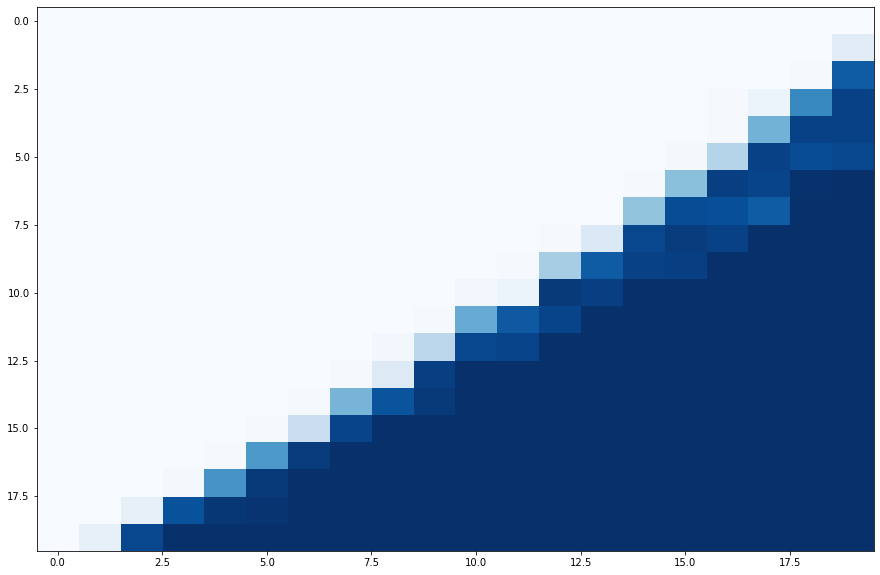

In [66]:
ax.imshow(values4, cmap=plt.cm.get_cmap('Blues'), aspect='auto')
fig

In [8]:
block_size = 100
xs = np.arange(1, 21)
i = (np.log(block_size) / block_size * np.arange(1, 21)).round(2)

idx = np.arange(len(xs))
mask = np.zeros((len(xs), len(xs)), dtype=bool)

for a, b in product(xs, xs):
    if a >= b:
        mask[a-1, b-1] = (np.abs(np.sqrt(a) - np.sqrt(b)) >= np.sqrt(2))
theory_df = pd.DataFrame(mask, columns=i, index=i).T.sort_index(ascending=False).sort_index(axis=1, ascending=True)
values_theory = theory_df.to_numpy()

In [10]:
experiments = [x for _, x in df.groupby(['method'])]
columns = ['p', 'q', 'score']

for experiment in experiments:

    method = experiment['method'].iloc[0]

    data = experiment[columns]
    fig, ax = plt.subplots(figsize=(15, 10))

    name = f"benchmark_sbm_{method}"

    make_result_heatmap(data, ax, x_column=columns[0], y_column=columns[1], values_column=columns[2])
    add_lines(values_theory, ax)
    ax.set_axisbelow(True)

    fig.tight_layout()

    fig.savefig(f'{path_out / name}.pdf')
    plt.close(fig) 